In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("../../creditScoring/data/raw/data.csv",low_memory=False)
dataframe= pd.read_csv("../../creditScoring/data/raw/Xente_Variable_Definitions.csv", low_memory=False)

In [8]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [9]:
print(df.isnull().sum())

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [18]:
print(df.dtypes)

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [21]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [10]:
df.describe

<bound method NDFrame.describe of               TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
0       SubscriptionId_887  CustomerId_4406          UGX          256   
1      SubscriptionId_3829  CustomerId_4406          UGX       

In [9]:
dataframe.head()

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account


In [10]:
print(dataframe.dtypes)

Column Name    object
Definition     object
dtype: object


In [11]:
print(dataframe.isnull().sum())

Column Name    0
Definition     0
dtype: int64


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  F

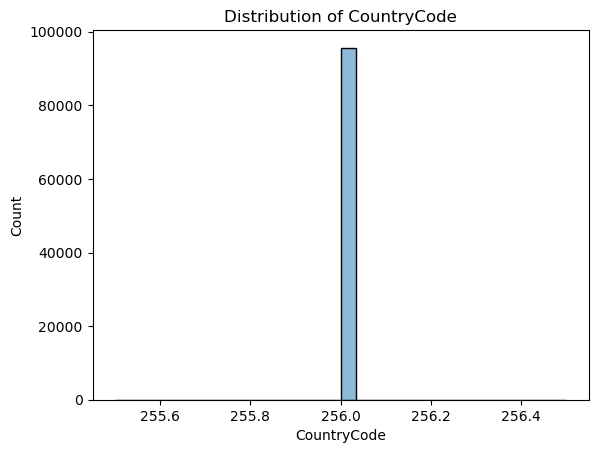

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

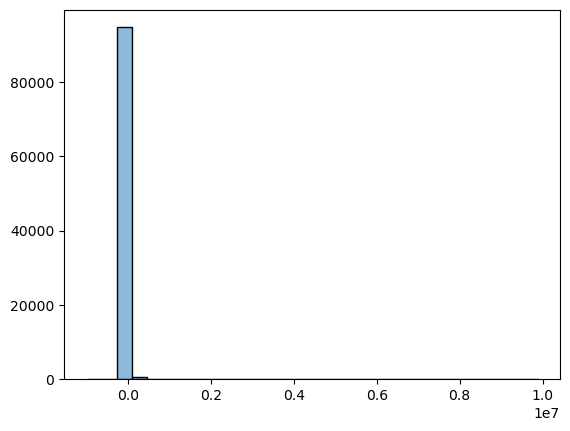

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Load the processed DataFrame
df_processed = pd.read_csv('creditScoring/data/processed/processed.csv')

# Overview of the Data
def data_overview(df):
    print("Overview of the Data:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\nData Types:\n", df.dtypes)

# Summary Statistics
def summary_statistics(df):
    print("\nSummary Statistics:")
    print(df.describe(include='all'))

# Distribution of Numerical Features
def numerical_feature_distribution(df):
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    num_features_count = len(numerical_features)
    rows = math.ceil(num_features_count / 3)
    plt.figure(figsize=(15, rows * 5))
    for i, feature in enumerate(numerical_features):
        plt.subplot(rows, 3, i + 1)
        sns.histplot(df[feature], bins=15, kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Distribution of Categorical Features
def categorical_feature_distribution(df):
    categorical_features = df.select_dtypes(include=['object']).columns
    for feature in categorical_features:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        plt.show()

# Correlation Analysis
def correlation_analysis(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Identifying Missing Values
def missing_values(df):
    print("\nMissing Values:")
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    print(missing.sort_values(ascending=False))

# Outlier Detection
def outlier_detection(df):
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    for feature in numerical_features:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[feature])
        plt.title(f'Box Plot of {feature}')
        plt.show()

# Perform EDA
data_overview(df_processed)
summary_statistics(df_processed)
numerical_feature_distribution(df_processed)
categorical_feature_distribution(df_processed)
correlation_analysis(df_processed)
missing_values(df_processed)
outlier_detection(df_processed)


Number of rows: 95662
Number of columns: 16

Data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

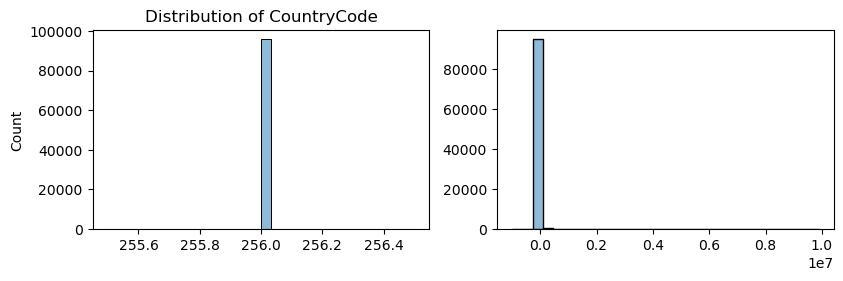

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
def load_data(file_path):
    return pd.read_csv(file_path)

# Function to display an overview of the dataset
def data_columnROW(data):
    num_rows, num_cols = data.shape
    data_types = data.dtypes
    print(f"Number of rows: {num_rows}\nNumber of columns: {num_cols}\n")
    print("Data types:")
    print(data_types)
    print("\n")

# 1. Overview of the Data
def data_overview(data):
    print("Dataset Overview:")
    print(data.info())
    print("\n")

# 2. Summary Statistics
def summary_statistics(data):
    print("Summary Statistics:")
    print(data.describe())
    print("\n")

# 3. Distribution of Numerical Features
def plot_numerical_distribution(data):
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Numerical Features: {numerical_features}")
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(numerical_features):
        plt.subplot(5, 4, i + 1)
        # Convert the pandas Series to a numpy array
        feature_data = data[feature].to_numpy()
        sns.histplot(feature_data, kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()


# 4. Distribution of Categorical Features
def plot_categorical_distribution(data):
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical Features: {categorical_features}")
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(categorical_features):
        plt.subplot(5, 4, i + 1)
        sns.countplot(y=data[feature], order=data[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# 5. Correlation Analysis
def correlation_analysis(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# 6. Identifying Missing Values
def identify_missing_values(data):
    missing_values = data.isnull().sum()
    print("Missing Values:")
    print(missing_values[missing_values > 0])
    print("\n")

# 7. Outlier Detection
def detect_outliers(data):
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(numerical_features):
        plt.subplot(5, 4, i + 1)
        sns.boxplot(data[feature])
        plt.title(f'Box plot of {feature}')
    plt.tight_layout()
    plt.show()

def main(file_path):
    data = load_data(file_path)
    data_columnROW(data)
    data_overview(data)
    summary_statistics(data)
    plot_numerical_distribution(data)
    plot_categorical_distribution(data)
    correlation_analysis(data)
    identify_missing_values(data)
    detect_outliers(data)

if __name__ == "__main__":
    file_path = '../../creditScoring/data/raw/data.csv'
    main(file_path)
